In [2]:
import sys
sys.version

'3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]'

In [1]:
# User Inputs
dir_name = r'C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\Sprint 5_fix\2form_slicing'
base_filename = 'preprocessed.png'
config_filename = 'CMS1500_config_WF_ref.json'

In [3]:
# Setting up by importing all the relevant libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import misc
import json
from pprint import pprint
import io
import base64

In [ ]:
# Loading the CMS1500 Form in the form of an array
img_form = cv2.imread(os.path.join(dir_name, base_filename))
img_form_gray = cv2.cvtColor(img_form,cv2.COLOR_BGR2GRAY)
img_form_gray = cv2.GaussianBlur(img_form_gray,(5,5),0)
img_form_gray.shape

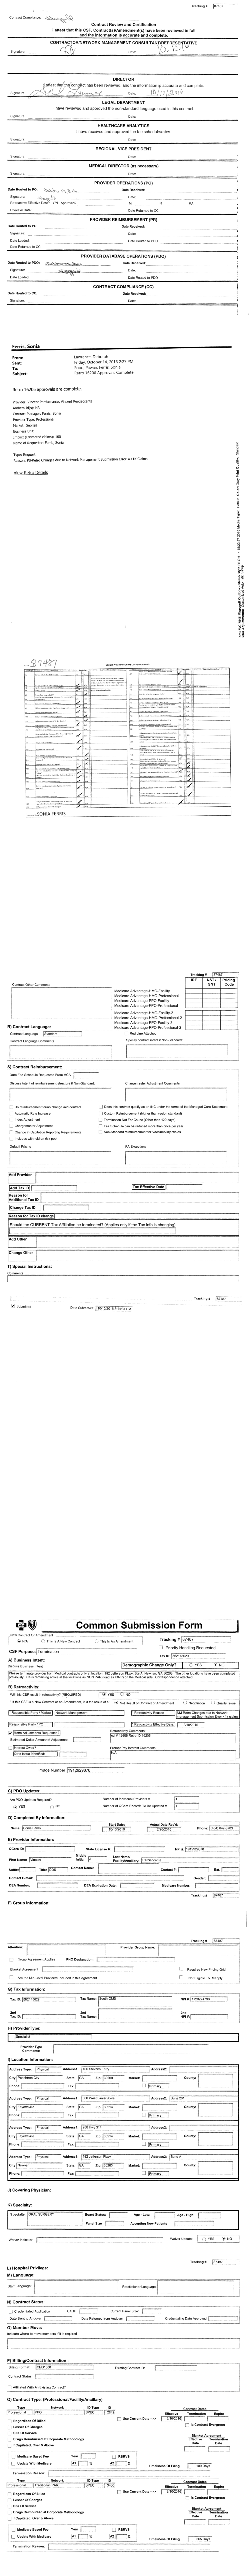

In [6]:
misc.toimage(img_form_gray)

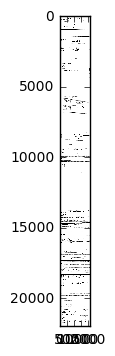

(<matplotlib.image.AxesImage at 0x23f6012a208>, None)

In [5]:
plt.imshow(img_form),plt.show()

In [8]:
img_r = cv2.resize(img_form_gray, (300, 300))

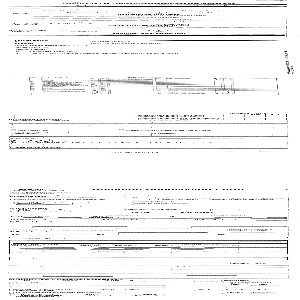

In [9]:
misc.toimage(img_r)

In [35]:
with open(os.path.join(dir_name, config_filename)) as data_file:
    dict_config = json.load(data_file)

In [38]:
scales = np.arange(0.5, 2.0, 0.1)
key = dict_config.keys()[0]

scale_large = 0.0
scale_small = 0.0
max_corr = 0.0

for i in scales:
    for j in scales:
        large_image = cv2.resize(img_form_gray,None,fx=i, fy=i, interpolation = cv2.INTER_CUBIC)
        ref1 = dict_config[key]["ref1"]
        ref1_d = ref1.decode('base64')
        with open('temp_image.png', 'wb') as f:
            f.write(ref1_d)
            f.close()
        img_ref1 = cv2.imread('temp_image.png',0)
        small_image = cv2.resize(img_ref1,None,fx=j, fy=j, interpolation = cv2.INTER_CUBIC)
        if ((small_image.shape[0] >= large_image.shape[0]) |
                (small_image.shape[1] >= large_image.shape[1])):
            break
#         print i, j, small_image.shape, large_image.shape, mx
        result = cv2.matchTemplate(large_image, small_image, cv2.TM_CCOEFF_NORMED)
        _,mx,_,mxLoc = cv2.minMaxLoc(result)
        if (mx > max_corr):
            scale_large = i
            scale_small = j
            max_corr = mx
    print (scale_large, scale_small, max_corr)

TypeError: 'dict_keys' object does not support indexing

In [39]:
img_form_gray.shape

(2734, 2357)

In [40]:
scale_large = 1.0
scale_small = 1.0

In [41]:
max_val_ = 0
max_loc_ = 0
for key in dict_config.keys():
    ref1 = dict_config[key]["ref1"]
    ref2 = dict_config[key]["ref2"]
    ref1_d = ref1.decode('base64')
    with open('temp_image.png', 'wb') as f:
        f.write(ref1_d)
        f.close()
    img_ref1 = cv2.imread('temp_image.png',0)
    large_image = cv2.resize(img_form_gray,None,fx=scale_large, fy=scale_large, interpolation = cv2.INTER_CUBIC)
    small_image = cv2.resize(img_ref1,None,fx=scale_small, fy=scale_small, interpolation = cv2.INTER_CUBIC)
    result = cv2.matchTemplate(large_image, small_image, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)

    if dict_config[key]["type"] == "omr":
        dict_config[key]["coordinates"] = {"x1": int(max_loc[0]),
                                           "x2": int(max_loc[0] + small_image.shape[1]),
                                           "y1": int(max_loc[1]),
                                           "y2": int(max_loc[1] + small_image.shape[0])}
    if dict_config[key]["type"] == "txt":
        dict_config[key]["coordinates"] = {"x1": int(max_loc[0]),
                                           "x2": int(max_loc[0] + small_image.shape[1]),
                                           "y1": int(max_loc[1] + small_image.shape[0]),
                                           "y2": int(max_loc[1] + (2 * small_image.shape[0]))}
    if dict_config[key]["type"] == "tbl":
        ref2_d = ref2.decode('base64')
        with open('temp_image.png', 'wb') as f:
            f.write(ref2_d)
            f.close()
        img_ref2 = cv2.imread('temp_image.png',0)
#         large_image = cv2.resize(img_form_gray,None,fx=scale_large, fy=scale_large, interpolation = cv2.INTER_CUBIC)
        small_image_ = cv2.resize(img_ref2,None,fx=scale_small, fy=scale_small, interpolation = cv2.INTER_CUBIC)
        result = cv2.matchTemplate(large_image, small_image_, cv2.TM_CCOEFF_NORMED)
        _, max_val_, _, max_loc_ = cv2.minMaxLoc(result)
        dict_config[key]["coordinates"] = {"x1": int(max_loc[0]),
                                           "x2": int(max_loc[0] + small_image.shape[1]),
                                           "y1": int(max_loc[1] + 100),
                                           "y2": int(max_loc_[1])}
    
    del dict_config[key]["ref1"], dict_config[key]["ref2"]
    # Section below only for testing
    print (max_loc, max_loc_)
    print (key, large_image.shape, small_image.shape, dict_config[key]["coordinates"], max_val, max_val_
    img_slice = misc.toimage(large_image[dict_config[key]["coordinates"]["y1"]: dict_config[key]["coordinates"]["y2"],
                                           dict_config[key]["coordinates"]["x1"]: dict_config[key]["coordinates"]["x2"]])

    misc.imsave(os.path.join(dir_name, key + '_slice.png'), img_slice)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-41-fda9d79f091a>, line 43)

In [32]:
# (15, 6003) (226, 5240)
h, w = small_image.shape
print h, w
print large_image.shape

180 4266
(6270L, 4845L)


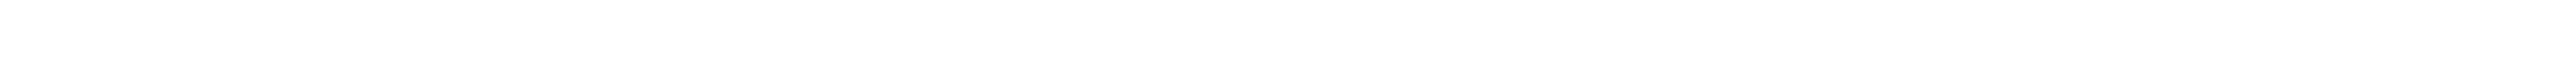

In [29]:
misc.toimage(large_image[6003:6103,15:4281])

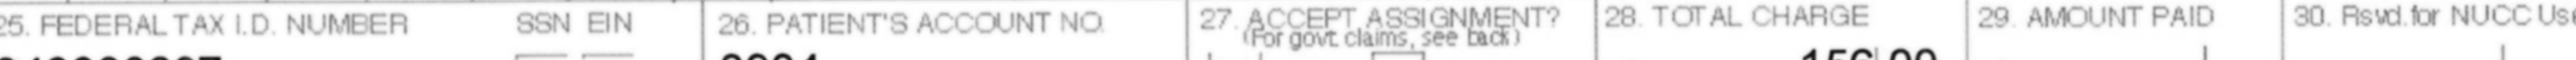

In [33]:
misc.toimage(large_image[5240:5340,226:4492])

In [ ]:
# Loop for rescaling to different levels

In [87]:
# Export the updated dictionary as a new (json) configuration file
with open(config_filename.replace("_ref","").replace(".json","") + "_coord.json", 'w') as fp:
    json.dump(dict_config, fp)
    print (config_filename.replace("_ref","").replace(".json","") + "_ref.json created successfully")

CMS1500_config_WF_ref.json created successfully
